# RQ3: What factors influence an artist's success?
## (SUBQUESTION)
### What can we deduce from the top 5 artists' popularity on both platforms?


This code analyzes track performance across Spotify and Deezer, comparing original tracks versus remixes. It's related with RQ1.




Reading file from: c:\Users\susan\group4ds\Data\Processed\spotify_deezer_merged.csv


C:\Users\susan\AppData\Local\Temp\ipykernel_16712\631142498.py:61: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(
C:\Users\susan\AppData\Local\Temp\ipykernel_16712\631142498.py:72: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.barplot(


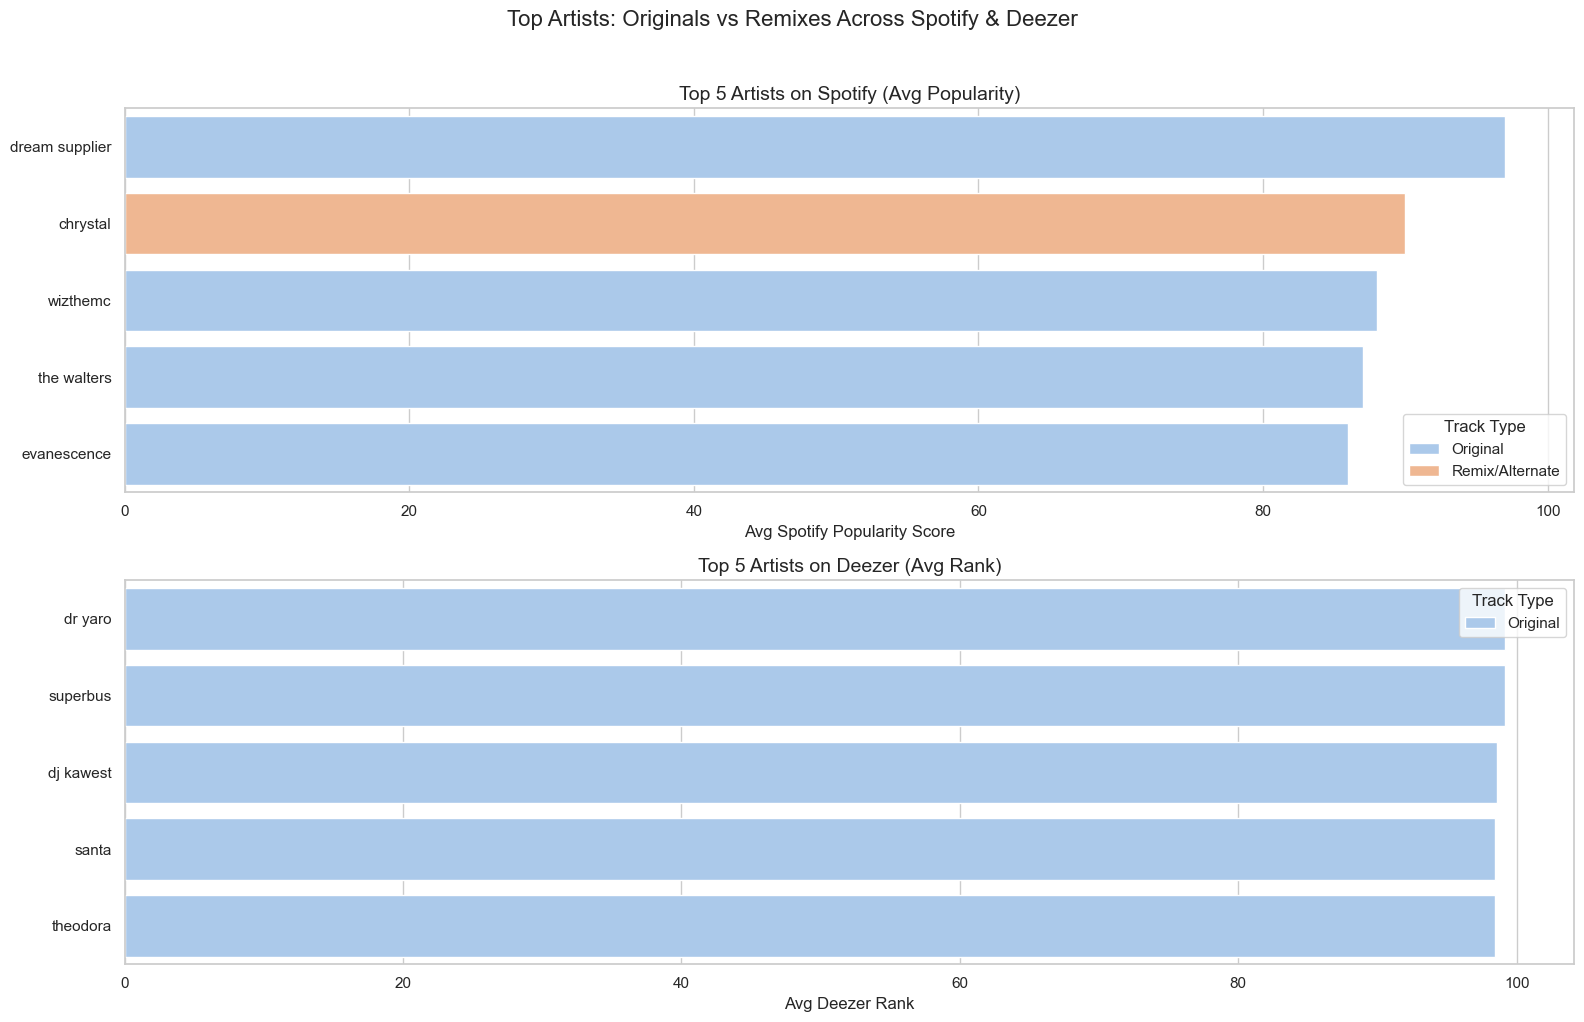

In [4]:

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PROCESSED_DIR = os.path.abspath(os.path.join(os.getcwd(), "../../Data/Processed"))
file_path = os.path.join(PROCESSED_DIR, 'spotify_deezer_merged.csv')
print(f"Reading file from: {file_path}")

df = pd.read_csv(file_path)

df['deezer.title'] = df['deezer.title'].astype(str).str.lower()
df['deezer.artist'] = df['deezer.artist'].astype(str).str.lower()

# Categorize track type based on title keyword (remix)
df['track_type'] = df['deezer.title'].apply(
    lambda x: 'Remix/Alternate' if 'remix' in x or 'alternate' in x else 'Original'
)

df['spotify.popularity'] = pd.to_numeric(df['spotify.popularity'], errors='coerce')
df['deezer.rank'] = pd.to_numeric(df['deezer.rank'], errors='coerce')

# Drop rows with missing popularity or rank
df = df.dropna(subset=['spotify.popularity', 'deezer.rank'])

df = df.drop_duplicates(subset=['deezer.artist', 'deezer.title'])

# Compute average popularity per artist and track type 
avg_popularity = df.groupby(['deezer.artist', 'track_type']).agg(
    avg_spotify_popularity=('spotify.popularity', 'mean'),
    avg_deezer_rank=('deezer.rank', 'mean')
).reset_index()

# Clean artist names for plotting 
avg_popularity['safe_artist'] = avg_popularity['deezer.artist'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# Focus on top 5 artists on each platform 

top_spotify_artists = (
    avg_popularity.groupby('safe_artist')['avg_spotify_popularity']
    .mean()
    .nlargest(5)
    .index
)
spotify_top_df = avg_popularity[avg_popularity['safe_artist'].isin(top_spotify_artists)]

top_deezer_artists = (
    avg_popularity.groupby('safe_artist')['avg_deezer_rank']
    .mean()
    .nlargest(5)
    .index
)
deezer_top_df = avg_popularity[avg_popularity['safe_artist'].isin(top_deezer_artists)]

sns.set(style='whitegrid')
palette = sns.color_palette("pastel")

plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
sns.barplot(
    data=spotify_top_df.sort_values('avg_spotify_popularity', ascending=False),
    x='avg_spotify_popularity', y='safe_artist',
    hue='track_type', palette=palette
)
plt.title('Top 5 Artists on Spotify (Avg Popularity)', fontsize=14)
plt.xlabel('Avg Spotify Popularity Score')
plt.ylabel('')
plt.legend(title='Track Type')

plt.subplot(2, 1, 2)
sns.barplot(
    data=deezer_top_df.sort_values('avg_deezer_rank', ascending=False),
    x='avg_deezer_rank', y='safe_artist',
    hue='track_type', palette=palette
)
plt.title('Top 5 Artists on Deezer (Avg Rank)', fontsize=14)
plt.xlabel('Avg Deezer Rank')
plt.ylabel('')
plt.legend(title='Track Type')

plt.suptitle('Top Artists: Originals vs Remixes Across Spotify & Deezer', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


### Conclusion
This helps understand how remixes and original tracks perform on different platforms, basically giving us insights into artists' success strategies. Originals seem to be the main character in both bar charts but we have to keep in mind that most of these artists only have one song with a really good score in the dataset, so the average popularity score will only be their most poplar track.